# LangGraph Agent
## Without tools

## Library Imports

In [1]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
import os  # <-- ADD THIS



from swc_toolkit import SportsWorldCentralToolkit
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from typing import Literal

SWC_API_BASE_URL in SWCConfig init: http://0.0.0.0:8000


## Configure logging

In [2]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='langgraph_notebook.log',  
    level=logging.INFO,
)

## Create toolkit

In [3]:
swc_toolkit = SportsWorldCentralToolkit()
tools = swc_toolkit.get_tools()

## Configure Agent and Model

In [4]:
tool_node = ToolNode(tools)
import os

# --- API Key Configuration ---
if "GOOGLE_API_KEY" not in os.environ:
    print("Warning: GOOGLE_API_KEY not set. Please set it as a Codespace secret.")


# --- Model Definition ---
model = ChatGoogleGenerativeAI(model="gemini-2.5-pro", temperature=0).bind_tools(tools)

# ▼▼▼ ALL THE CODE BELOW THIS LINE REMAINS THE SAME ▼▼▼
def should_continue(state: MessagesState) -> Literal["tools", END]:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

def call_model(state: MessagesState):
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", 'agent')

checkpointer = MemorySaver()

app = workflow.compile(checkpointer=checkpointer)

## Visualize the Graph

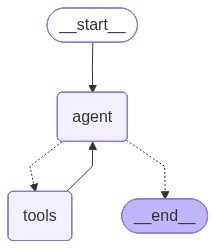

In [5]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Chat with the Agent and its tools

In [6]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the SportsWorldCentral fantasy football platform? Keep the response simple.")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Here are the leagues in the SportsWorldCentral fantasy football platform:

* Pigskin Prodigal Fantasy League
* Recurring Champions League
* AHAHFZZFFFL
* Gridiron Gurus Fantasy League
* Best League Ever